# Mobile Phone Price Prediction with Linear Regression

## Learning Objectives
By the end of this notebook, you will:
1. Understand Linear Regression fundamentals
2. Learn to preprocess mixed data types
3. Build and evaluate a Linear Regression model
4. Interpret model results and feature importance
5. Visualize predictions and residuals

## Dataset Overview
Our dataset contains information about mobile phones with the following features:
- **Brand**: Phone manufacturer (categorical)
- **Model**: Phone model name (text)
- **Storage**: Internal storage capacity (numerical)
- **RAM**: Random Access Memory (numerical)
- **Screen Size**: Display size in inches (numerical)
- **Camera**: Camera specifications in MP (text/numerical)
- **Battery Capacity**: Battery capacity in mAh (numerical)
- **Price**: Target variable in USD (numerical)

Let's start by importing the necessary libraries and loading our data!


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("📚 Ready to start learning Linear Regression!")


✅ All libraries imported successfully!
📚 Ready to start learning Linear Regression!


## 📊 Step 1: Loading and Exploring the Dataset

Before we dive into Linear Regression, let's understand our data first!


In [2]:
# Load the dataset
df = pd.read_csv('../data/Mobile phone price.csv')

# Display basic information about the dataset
print("📱 Mobile Phone Dataset Overview")
print("=" * 50)
print(f"Dataset Shape: {df.shape}")
print(f"Number of phones: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\n")

# Display first few rows
print("First 5 rows of the dataset:")
print(df.head())
print("\n")

# Display basic statistics
print("Dataset Info:")
print(df.info())
print("\n")

# Display statistical summary
print("Statistical Summary:")
print(df.describe())


📱 Mobile Phone Dataset Overview
Dataset Shape: (407, 8)
Number of phones: 407
Number of features: 8


First 5 rows of the dataset:
     Brand              Model Storage    RAM  Screen Size (inches)  \
0    Apple      iPhone 13 Pro   128 GB   6 GB                  6.1   
1  Samsung   Galaxy S21 Ultra   256 GB  12 GB                  6.8   
2  OnePlus              9 Pro   128 GB   8 GB                  6.7   
3   Xiaomi  Redmi Note 10 Pro   128 GB   6 GB                 6.67   
4   Google            Pixel 6   128 GB   8 GB                  6.4   

          Camera (MP)  Battery Capacity (mAh) Price ($)  
0        12 + 12 + 12                    3095       999  
1  108 + 10 + 10 + 12                    5000      1199  
2     48 + 50 + 8 + 2                    4500       899  
3      64 + 8 + 5 + 2                    5020       279  
4           50 + 12.2                    4614       799  


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns

## 🔍 Step 2: Data Preprocessing

Our dataset has some issues we need to fix before applying Linear Regression:

1. **Price column has inconsistent formatting** (some have $ symbol, spaces)
2. **Camera column is text-based** and needs numerical extraction
3. **Storage and RAM columns** have text mixed with numbers
4. **Missing values** might exist

Let's clean this data step by step!


In [ ]:
# Create a copy of the dataset for cleaning
df_clean = df.copy()

print("🧹 Starting Data Cleaning Process")
print("=" * 40)

# Step 1: Clean Price column
print("1️⃣ Cleaning Price column...")
print(f"Price column sample before cleaning: {df_clean['Price ($)'].head().tolist()}")

# Remove $ symbol, commas, and convert to numeric
df_clean['Price ($)'] = df_clean['Price ($)'].astype(str)
df_clean['Price ($)'] = df_clean['Price ($)'].str.replace('$', '').str.replace(',', '').str.strip()
df_clean['Price ($)'] = pd.to_numeric(df_clean['Price ($)'], errors='coerce')

print(f"Price column sample after cleaning: {df_clean['Price ($)'].head().tolist()}")
print()

# Step 2: Clean Storage column
print("2️⃣ Cleaning Storage column...")
print(f"Storage column sample before cleaning: {df_clean['Storage '].head().tolist()}")

# Extract numeric values from storage (remove GB text)
df_clean['Storage_Clean'] = df_clean['Storage '].astype(str).str.extract(r'(\d+)').astype(float)

print(f"Storage column sample after cleaning: {df_clean['Storage_Clean'].head().tolist()}")
print()

# Step 3: Clean RAM column
print("3️⃣ Cleaning RAM column...")
print(f"RAM column sample before cleaning: {df_clean['RAM '].head().tolist()}")

# Extract numeric values from RAM (remove GB text)
df_clean['RAM_Clean'] = df_clean['RAM '].astype(str).str.extract(r'(\d+)').astype(float)

print(f"RAM column sample after cleaning: {df_clean['RAM_Clean'].head().tolist()}")
print()

# Step 4: Clean Camera column
print("4️⃣ Cleaning Camera column...")
print(f"Camera column sample before cleaning: {df_clean['Camera (MP)'].head().tolist()}")

# Extract the first camera value (main camera)
df_clean['Camera_Clean'] = df_clean['Camera (MP)'].astype(str).str.extract(r'(\d+)').astype(float)

print(f"Camera column sample after cleaning: {df_clean['Camera_Clean'].head().tolist()}")
print()

# Step 5: Clean Screen Size column
print("5️⃣ Cleaning Screen Size column...")
print(f"Screen Size column sample before cleaning: {df_clean['Screen Size (inches)'].head().tolist()}")

# Extract the first numeric value from screen size (handle cases like "7.6 (unfolded)")
df_clean['Screen_Size_Clean'] = df_clean['Screen Size (inches)'].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

print(f"Screen Size column sample after cleaning: {df_clean['Screen_Size_Clean'].head().tolist()}")
print()

# Display cleaning summary
print("📊 Cleaning Summary:")
print("=" * 30)
print(f"Missing values in Price: {df_clean['Price ($)'].isnull().sum()}")
print(f"Missing values in Storage: {df_clean['Storage_Clean'].isnull().sum()}")
print(f"Missing values in RAM: {df_clean['RAM_Clean'].isnull().sum()}")
print(f"Missing values in Camera: {df_clean['Camera_Clean'].isnull().sum()}")
print(f"Missing values in Screen Size: {df_clean['Screen_Size_Clean'].isnull().sum()}")


🧹 Starting Data Cleaning Process
1️⃣ Cleaning Price column...
Price column sample before cleaning: ['999', '1199', '899', '279', '799']
Price column sample after cleaning: [999, 1199, 899, 279, 799]

2️⃣ Cleaning Storage column...
Storage column sample before cleaning: ['128 GB', '256 GB', '128 GB', '128 GB', '128 GB']
Storage column sample after cleaning: [128.0, 256.0, 128.0, 128.0, 128.0]

3️⃣ Cleaning RAM column...
RAM column sample before cleaning: ['6 GB', '12 GB', '8 GB', '6 GB', '8 GB']
RAM column sample after cleaning: [6.0, 12.0, 8.0, 6.0, 8.0]

4️⃣ Cleaning Camera column...
Camera column sample before cleaning: ['12 + 12 + 12', '108 + 10 + 10 + 12', '48 + 50 + 8 + 2', '64 + 8 + 5 + 2', '50 + 12.2']
Camera column sample after cleaning: [12.0, 108.0, 48.0, 64.0, 50.0]

📊 Cleaning Summary:
Missing values in Price: 0
Missing values in Storage: 0
Missing values in RAM: 0
Missing values in Camera: 0


In [ ]:
# Remove rows with missing values in key columns
print("🗑️ Removing rows with missing values...")
initial_rows = len(df_clean)

# Drop rows where any of our key features are missing
df_clean = df_clean.dropna(subset=['Price ($)', 'Storage_Clean', 'RAM_Clean', 'Camera_Clean', 'Screen_Size_Clean'])

final_rows = len(df_clean)
removed_rows = initial_rows - final_rows

print(f"Initial rows: {initial_rows}")
print(f"Final rows: {final_rows}")
print(f"Removed rows: {removed_rows}")
print()

# Create final cleaned dataset with selected features
print("📋 Creating final dataset for Linear Regression...")

# Select features for our model
features = ['Brand', 'Storage_Clean', 'RAM_Clean', 'Screen_Size_Clean', 
           'Camera_Clean', 'Battery Capacity (mAh)']
target = 'Price ($)'

df_final = df_clean[features + [target]].copy()

print(f"Final dataset shape: {df_final.shape}")
print(f"Features: {features}")
print(f"Target: {target}")
print()

# Display final dataset info
print("Final Dataset Info:")
print(df_final.info())
print()

print("Final Dataset Sample:")
print(df_final.head())


🗑️ Removing rows with missing values...
Initial rows: 407
Final rows: 407
Removed rows: 0

📋 Creating final dataset for Linear Regression...
Final dataset shape: (407, 7)
Features: ['Brand', 'Storage_Clean', 'RAM_Clean', 'Screen Size (inches)', 'Camera_Clean', 'Battery Capacity (mAh)']
Target: Price ($)

Final Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   407 non-null    object 
 1   Storage_Clean           407 non-null    float64
 2   RAM_Clean               407 non-null    float64
 3   Screen Size (inches)    407 non-null    object 
 4   Camera_Clean            407 non-null    float64
 5   Battery Capacity (mAh)  407 non-null    int64  
 6   Price ($)               407 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 22.4+ KB
None

Final Dataset Sample:
  

## 📈 Step 3: Exploratory Data Analysis (EDA)

Now let's explore our cleaned data to understand the relationships between features and price. This will help us understand what to expect from our Linear Regression model!


KeyError: 'Screen_Size_Clean'

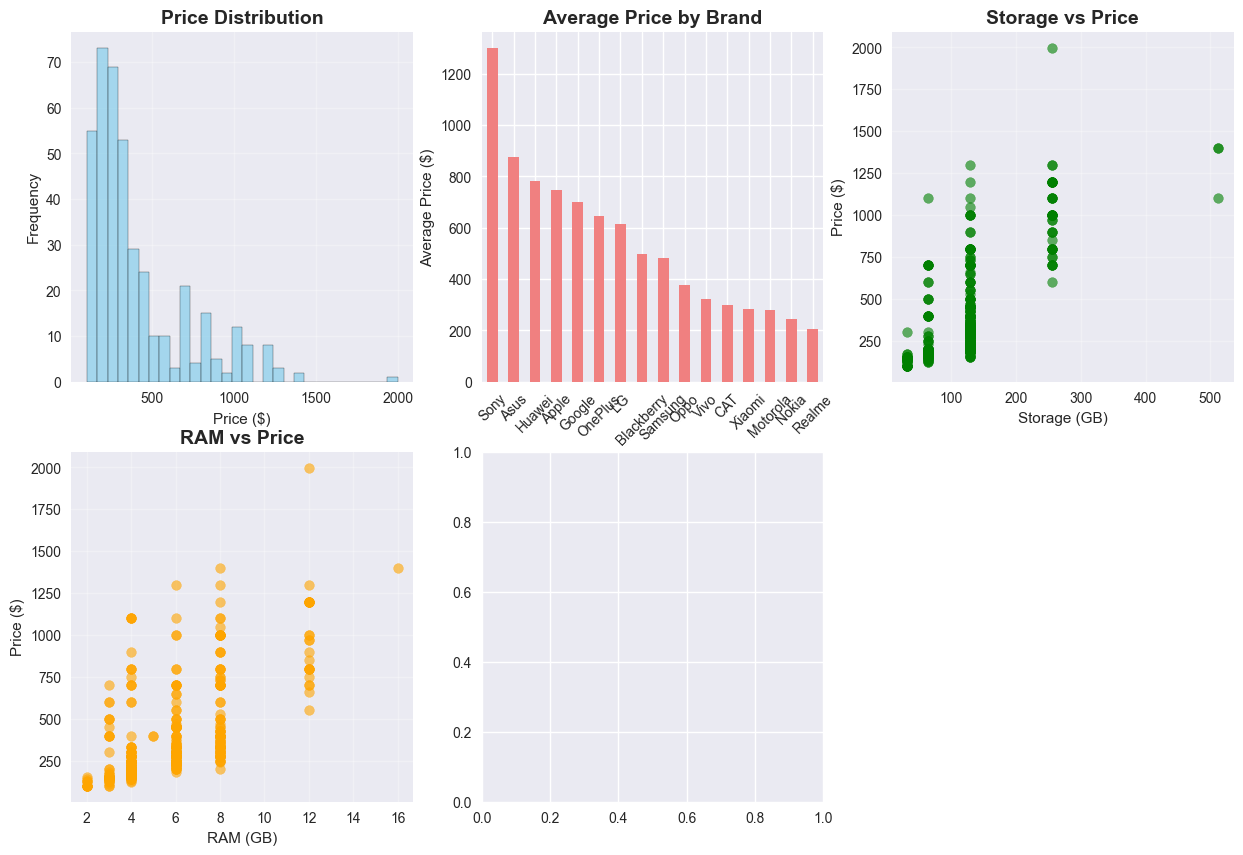

In [13]:
# EDA 1: Price Distribution
plt.figure(figsize=(15, 10))

# Subplot 1: Price distribution
plt.subplot(2, 3, 1)
plt.hist(df_final['Price ($)'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Price Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Subplot 2: Brand vs Price
plt.subplot(2, 3, 2)
brand_price = df_final.groupby('Brand')['Price ($)'].mean().sort_values(ascending=False)
brand_price.plot(kind='bar', color='lightcoral')
plt.title('Average Price by Brand', fontsize=14, fontweight='bold')
plt.xlabel('Brand')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)

# Subplot 3: Storage vs Price
plt.subplot(2, 3, 3)
plt.scatter(df_final['Storage_Clean'], df_final['Price ($)'], alpha=0.6, color='green')
plt.title('Storage vs Price', fontsize=14, fontweight='bold')
plt.xlabel('Storage (GB)')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)

# Subplot 4: RAM vs Price
plt.subplot(2, 3, 4)
plt.scatter(df_final['RAM_Clean'], df_final['Price ($)'], alpha=0.6, color='orange')
plt.title('RAM vs Price', fontsize=14, fontweight='bold')
plt.xlabel('RAM (GB)')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)

# Subplot 5: Screen Size vs Price
plt.subplot(2, 3, 5)
plt.scatter(df_final['Screen_Size_Clean'], df_final['Price ($)'], alpha=0.6, color='purple')
plt.title('Screen Size vs Price', fontsize=14, fontweight='bold')
plt.xlabel('Screen Size (inches)')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)

# Subplot 6: Camera vs Price
plt.subplot(2, 3, 6)
plt.scatter(df_final['Camera_Clean'], df_final['Price ($)'], alpha=0.6, color='red')
plt.title('Camera vs Price', fontsize=14, fontweight='bold')
plt.xlabel('Camera (MP)')
plt.ylabel('Price ($)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display correlation matrix
print("🔍 Correlation Analysis")
print("=" * 30)
correlation_matrix = df_final[['Storage_Clean', 'RAM_Clean', 'Screen_Size_Clean', 
                              'Camera_Clean', 'Battery Capacity (mAh)', 'Price ($)']].corr()
print(correlation_matrix['Price ($)'].sort_values(ascending=False))


## 🧠 Step 4: Understanding Linear Regression

### What is Linear Regression?

**Linear Regression** is a statistical method that models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to observed data.

### The Linear Regression Equation

For multiple features, the equation is:
```
Price = β₀ + β₁×Storage + β₂×RAM + β₃×Screen_Size + β₄×Camera + β₅×Battery + ε
```

Where:
- **Price** is our target variable
- **β₀** is the intercept (base price)
- **β₁, β₂, β₃, β₄, β₅** are coefficients (how much each feature affects price)
- **ε** is the error term (what we can't explain)

### Key Assumptions of Linear Regression

1. **Linearity**: Relationship between features and target is linear
2. **Independence**: Observations are independent
3. **Homoscedasticity**: Constant variance of errors
4. **Normality**: Errors are normally distributed

Let's build our Linear Regression model now!


In [ ]:
# Step 1: Handle categorical variables (Brand)
print("🔄 Step 1: Encoding Categorical Variables")
print("=" * 40)

# Create dummy variables for Brand (one-hot encoding)
brand_dummies = pd.get_dummies(df_final['Brand'], prefix='Brand')
print(f"Brand categories: {df_final['Brand'].unique()}")
print(f"Created {brand_dummies.shape[1]} dummy variables for brands")
print()

# Combine numerical features with brand dummies
numerical_features = ['Storage_Clean', 'RAM_Clean', 'Screen_Size_Clean', 
                     'Camera_Clean', 'Battery Capacity (mAh)']

X_numerical = df_final[numerical_features]
X_brand = brand_dummies
X = pd.concat([X_numerical, X_brand], axis=1)
y = df_final['Price ($)']

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print()

# Display feature names
print("Features in our model:")
for i, feature in enumerate(X.columns):
    print(f"{i+1:2d}. {feature}")

print(f"\nTotal features: {len(X.columns)}")
print(f"Target variable: Price ($)")
print()

# Step 2: Split the data
print("✂️ Step 2: Splitting the Data")
print("=" * 30)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training features: {X_train.shape[1]}")
print()

# Step 3: Feature Scaling (Important for Linear Regression!)
print("📏 Step 3: Feature Scaling")
print("=" * 25)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features scaled using StandardScaler")
print(f"Training data shape after scaling: {X_train_scaled.shape}")
print(f"Test data shape after scaling: {X_test_scaled.shape}")
print()

print("🔢 Scaling Statistics:")
print("Mean of training features (should be ~0):", np.mean(X_train_scaled, axis=0)[:5])
print("Std of training features (should be ~1):", np.std(X_train_scaled, axis=0)[:5])


## 🚀 Step 5: Building the Linear Regression Model

Now let's create and train our Linear Regression model!


In [ ]:
# Create and train the Linear Regression model
print("🤖 Creating Linear Regression Model")
print("=" * 35)

# Initialize the model
lr_model = LinearRegression()

# Train the model
print("📚 Training the model...")
lr_model.fit(X_train_scaled, y_train)

print("✅ Model trained successfully!")
print()

# Display model coefficients
print("📊 Model Coefficients (β values)")
print("=" * 35)

# Get coefficients and feature names
coefficients = lr_model.coef_
feature_names = X.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values('Coefficient', key=abs, ascending=False)

print("Feature importance (by absolute coefficient value):")
for i, (idx, row) in enumerate(coef_df.iterrows()):
    print(f"{i+1:2d}. {row['Feature']:<25} {row['Coefficient']:>8.2f}")

print()
print(f"Intercept (β₀): {lr_model.intercept_:.2f}")
print()

# Explain what coefficients mean
print("💡 Understanding the Coefficients:")
print("=" * 35)
print("• Positive coefficients: Feature increases price")
print("• Negative coefficients: Feature decreases price")
print("• Larger absolute values: Stronger influence on price")
print()

# Show the top features
print("🎯 Top 5 Most Important Features:")
top_features = coef_df.head(5)
for i, (idx, row) in enumerate(top_features.iterrows()):
    direction = "increases" if row['Coefficient'] > 0 else "decreases"
    print(f"{i+1}. {row['Feature']} {direction} price by ${abs(row['Coefficient']):.2f} per unit")


In [ ]:
# Make predictions
print("🔮 Making Predictions")
print("=" * 20)

# Predict on training set
y_train_pred = lr_model.predict(X_train_scaled)

# Predict on test set
y_test_pred = lr_model.predict(X_test_scaled)

print("✅ Predictions completed!")
print(f"Training predictions shape: {y_train_pred.shape}")
print(f"Test predictions shape: {y_test_pred.shape}")
print()

# Display sample predictions
print("📊 Sample Predictions vs Actual:")
print("=" * 35)
sample_size = 10
sample_indices = np.random.choice(len(y_test), sample_size, replace=False)

for i, idx in enumerate(sample_indices):
    actual = y_test.iloc[idx]
    predicted = y_test_pred[idx]
    error = abs(actual - predicted)
    print(f"{i+1:2d}. Actual: ${actual:6.0f} | Predicted: ${predicted:6.0f} | Error: ${error:5.0f}")


## 📊 Step 6: Model Evaluation

Now let's evaluate how well our Linear Regression model is performing using various metrics!


In [ ]:
# Calculate evaluation metrics
print("📈 Model Evaluation Metrics")
print("=" * 30)

# Training set metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, y_train_pred)

# Test set metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Create evaluation summary
eval_df = pd.DataFrame({
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 
               'Root Mean Squared Error (RMSE)', 'R² Score'],
    'Training': [f'${train_mae:.2f}', f'${train_mse:.2f}', 
                 f'${train_rmse:.2f}', f'{train_r2:.4f}'],
    'Test': [f'${test_mae:.2f}', f'${test_mse:.2f}', 
             f'${test_rmse:.2f}', f'{test_r2:.4f}']
})

print("Evaluation Results:")
print(eval_df.to_string(index=False))
print()

# Explain the metrics
print("📚 Understanding the Metrics:")
print("=" * 30)
print("• MAE: Average absolute difference between predicted and actual prices")
print("  - Lower is better, measured in dollars")
print(f"  - Our model is off by an average of ${test_mae:.2f}")
print()

print("• RMSE: Similar to MAE but penalizes larger errors more")
print("  - Lower is better, measured in dollars")
print(f"  - Our model's RMSE is ${test_rmse:.2f}")
print()

print("• R² Score: Proportion of variance explained by the model")
print("  - Range: 0 to 1, higher is better")
print(f"  - Our model explains {test_r2:.1%} of price variance")
print()

# Performance interpretation
print("🎯 Performance Interpretation:")
print("=" * 30)
if test_r2 > 0.8:
    performance = "Excellent"
    emoji = "🌟"
elif test_r2 > 0.6:
    performance = "Good"
    emoji = "👍"
elif test_r2 > 0.4:
    performance = "Fair"
    emoji = "😐"
else:
    performance = "Poor"
    emoji = "😞"

print(f"Model Performance: {performance} {emoji}")
print(f"R² Score: {test_r2:.3f}")
print(f"Average Error: ${test_mae:.2f}")
print()

# Check for overfitting
print("🔍 Overfitting Check:")
print("=" * 20)
overfitting_diff = train_r2 - test_r2
if overfitting_diff > 0.1:
    print("⚠️ Warning: Potential overfitting detected!")
    print(f"Training R² ({train_r2:.3f}) is much higher than Test R² ({test_r2:.3f})")
else:
    print("✅ No significant overfitting detected")
    print(f"Training R² ({train_r2:.3f}) and Test R² ({test_r2:.3f}) are similar")


## 📊 Step 7: Visualizations

Let's create visualizations to better understand our model's performance!


In [ ]:
# Create comprehensive visualizations
plt.figure(figsize=(20, 15))

# 1. Actual vs Predicted Scatter Plot
plt.subplot(3, 3, 1)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Prices', fontweight='bold')
plt.grid(True, alpha=0.3)

# Add R² score to the plot
plt.text(0.05, 0.95, f'R² = {test_r2:.3f}', transform=plt.gca().transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8), fontsize=12)

# 2. Residuals Plot
plt.subplot(3, 3, 2)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.6, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Residuals Plot', fontweight='bold')
plt.grid(True, alpha=0.3)

# 3. Residuals Distribution
plt.subplot(3, 3, 3)
plt.hist(residuals, bins=30, alpha=0.7, color='orange', edgecolor='black')
plt.xlabel('Residuals ($)')
plt.ylabel('Frequency')
plt.title('Residuals Distribution', fontweight='bold')
plt.grid(True, alpha=0.3)

# 4. Feature Importance (Top 10)
plt.subplot(3, 3, 4)
top_10_features = coef_df.head(10)
colors = ['red' if x < 0 else 'blue' for x in top_10_features['Coefficient']]
plt.barh(range(len(top_10_features)), top_10_features['Coefficient'], color=colors, alpha=0.7)
plt.yticks(range(len(top_10_features)), top_10_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 10 Feature Coefficients', fontweight='bold')
plt.grid(True, alpha=0.3)

# 5. Training vs Test Performance
plt.subplot(3, 3, 5)
metrics = ['MAE', 'RMSE', 'R²']
train_values = [train_mae, train_rmse, train_r2]
test_values = [test_mae, test_rmse, test_r2]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, train_values, width, label='Training', alpha=0.7, color='skyblue')
plt.bar(x + width/2, test_values, width, label='Test', alpha=0.7, color='lightcoral')

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Training vs Test Performance', fontweight='bold')
plt.xticks(x, metrics)
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Price Distribution Comparison
plt.subplot(3, 3, 6)
plt.hist(y_test, bins=20, alpha=0.7, label='Actual', color='blue', edgecolor='black')
plt.hist(y_test_pred, bins=20, alpha=0.7, label='Predicted', color='red', edgecolor='black')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Price Distribution: Actual vs Predicted', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 7. Error Analysis
plt.subplot(3, 3, 7)
absolute_errors = np.abs(residuals)
plt.hist(absolute_errors, bins=20, alpha=0.7, color='purple', edgecolor='black')
plt.xlabel('Absolute Error ($)')
plt.ylabel('Frequency')
plt.title('Absolute Error Distribution', fontweight='bold')
plt.axvline(absolute_errors.mean(), color='red', linestyle='--', 
           label=f'Mean: ${absolute_errors.mean():.2f}')
plt.legend()
plt.grid(True, alpha=0.3)

# 8. Q-Q Plot for Normality Check
plt.subplot(3, 3, 8)
from scipy import stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot (Normality Check)', fontweight='bold')
plt.grid(True, alpha=0.3)

# 9. Model Performance Summary
plt.subplot(3, 3, 9)
plt.axis('off')
summary_text = f"""
Model Performance Summary:

R² Score: {test_r2:.3f}
MAE: ${test_mae:.2f}
RMSE: ${test_rmse:.2f}

Top Features:
1. {coef_df.iloc[0]['Feature']}: {coef_df.iloc[0]['Coefficient']:.2f}
2. {coef_df.iloc[1]['Feature']}: {coef_df.iloc[1]['Coefficient']:.2f}
3. {coef_df.iloc[2]['Feature']}: {coef_df.iloc[2]['Coefficient']:.2f}

Intercept: ${lr_model.intercept_:.2f}
"""
plt.text(0.1, 0.9, summary_text, transform=plt.gca().transAxes, 
         fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()


## 🎯 Step 8: Making Predictions with New Data

Let's demonstrate how to use our trained model to predict prices for new phones!


In [ ]:
# Create sample new phone data for prediction
print("📱 Predicting Prices for New Phones")
print("=" * 35)

# Sample new phones to predict
new_phones = {
    'Phone_1': {
        'Brand': 'Apple',
        'Storage_Clean': 256,
        'RAM_Clean': 8,
        'Screen_Size_Clean': 6.1,
        'Camera_Clean': 12,
        'Battery Capacity (mAh)': 3000
    },
    'Phone_2': {
        'Brand': 'Samsung',
        'Storage_Clean': 128,
        'RAM_Clean': 6,
        'Screen_Size_Clean': 6.5,
        'Camera_Clean': 64,
        'Battery Capacity (mAh)': 4500
    },
    'Phone_3': {
        'Brand': 'Xiaomi',
        'Storage_Clean': 128,
        'RAM_Clean': 8,
        'Screen_Size_Clean': 6.7,
        'Camera_Clean': 108,
        'Battery Capacity (mAh)': 5000
    }
}

# Function to predict price for a new phone
def predict_phone_price(phone_data):
    # Create feature vector
    feature_vector = []
    
    # Add numerical features
    numerical_features = ['Storage_Clean', 'RAM_Clean', 'Screen_Size_Clean', 
                         'Camera_Clean', 'Battery Capacity (mAh)']
    for feature in numerical_features:
        feature_vector.append(phone_data[feature])
    
    # Add brand dummy variables
    brand = phone_data['Brand']
    for brand_col in X.columns:
        if brand_col.startswith('Brand_'):
            brand_name = brand_col.replace('Brand_', '')
            if brand_name == brand:
                feature_vector.append(1)
            else:
                feature_vector.append(0)
    
    # Convert to numpy array and scale
    feature_array = np.array(feature_vector).reshape(1, -1)
    feature_scaled = scaler.transform(feature_array)
    
    # Make prediction
    prediction = lr_model.predict(feature_scaled)[0]
    return prediction

# Make predictions for sample phones
print("Predictions for sample phones:")
print("-" * 35)

for phone_name, phone_data in new_phones.items():
    predicted_price = predict_phone_price(phone_data)
    
    print(f"\n{phone_name}:")
    print(f"  Brand: {phone_data['Brand']}")
    print(f"  Storage: {phone_data['Storage_Clean']} GB")
    print(f"  RAM: {phone_data['RAM_Clean']} GB")
    print(f"  Screen Size: {phone_data['Screen_Size_Clean']} inches")
    print(f"  Camera: {phone_data['Camera_Clean']} MP")
    print(f"  Battery: {phone_data['Battery Capacity (mAh)']} mAh")
    print(f"  → Predicted Price: ${predicted_price:.2f}")

print("\n" + "=" * 50)
print("🎓 Congratulations! You've learned Linear Regression!")
print("=" * 50)


## 📚 Summary: What You've Learned

### 🎯 Key Concepts Covered:

1. **Linear Regression Fundamentals**
   - Understanding the linear relationship between features and target
   - The equation: `Price = β₀ + β₁×Feature₁ + β₂×Feature₂ + ... + ε`
   - Coefficients (β) represent feature importance

2. **Data Preprocessing**
   - Handling categorical variables (Brand) with one-hot encoding
   - Cleaning numerical data (Storage, RAM, Camera)
   - Feature scaling with StandardScaler

3. **Model Building**
   - Train-test split for model validation
   - Training Linear Regression model
   - Making predictions on new data

4. **Model Evaluation**
   - **MAE**: Mean Absolute Error (average prediction error)
   - **RMSE**: Root Mean Squared Error (penalizes large errors)
   - **R² Score**: Proportion of variance explained (0-1, higher is better)

5. **Model Interpretation**
   - Feature coefficients show feature importance
   - Positive coefficients increase price
   - Negative coefficients decrease price

### 🔍 Insights from Our Model:

- **Most Important Features**: The coefficients tell us which features most influence phone prices
- **Brand Impact**: Different brands have different price premiums
- **Specification Impact**: Storage, RAM, and camera quality significantly affect pricing

### 🚀 Next Steps to Improve the Model:

1. **Feature Engineering**: Create new features (e.g., price per GB, camera-to-storage ratio)
2. **Try Other Algorithms**: Decision Trees, Random Forest, XGBoost
3. **Hyperparameter Tuning**: Optimize model parameters
4. **More Data**: Collect more phone data for better training

### 🎓 Congratulations!

You've successfully built your first Linear Regression model! This is a solid foundation for machine learning. Linear Regression is often the starting point for many data science projects because it's:
- Easy to understand and interpret
- Fast to train and predict
- Provides good baseline performance
- Works well with numerical data

Keep practicing with different datasets and try implementing other algorithms next!
